# Implementation of K-Nearest Neighbour on Heart disease dataset

In [159]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import warnings

In [160]:
df = pd.read_csv('Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [161]:
#Find missing values in the data
df.isnull()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [163]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [164]:
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [165]:
df[[i for i in df.columns if df[i].isnull().sum()>0]].isnull().sum()

Ca      4
Thal    2
dtype: int64

In [166]:
#removing NaN values
df.Thal.value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

In [167]:
# As the maximum number of cases have 'Normal' as the Thal, replacing the missing value to 'Normal'
df.Thal = df.Thal.fillna('normal')
df.Thal.value_counts()

normal        168
reversable    117
fixed          18
Name: Thal, dtype: int64

In [168]:
df.Ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [169]:
# As the maximum number of cases have 0.0 as the Ca, replacing the missing value to 0.0
df.Ca = df.Ca.fillna(0.0)
df.Ca.value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [170]:
df['ChestPain']

0           typical
1      asymptomatic
2      asymptomatic
3        nonanginal
4        nontypical
           ...     
298         typical
299    asymptomatic
300    asymptomatic
301      nontypical
302      nonanginal
Name: ChestPain, Length: 303, dtype: object

In [171]:
#The code will print out the unique values of three different columns in the DataFrame: "ChestPain", "Thal", and "AHD".
#The "unique()" function is used to find the unique values of each column, which means that it will only show each value once, even if it appears multiple times in the column.
#Printing out the unique values of a column is a useful way to get a quick summary of the different values in the column, which can help with data exploration and understanding the data better.

print(df.ChestPain.unique)
print(df.Thal.unique)
print(df.AHD.unique)

<bound method Series.unique of 0           typical
1      asymptomatic
2      asymptomatic
3        nonanginal
4        nontypical
           ...     
298         typical
299    asymptomatic
300    asymptomatic
301      nontypical
302      nonanginal
Name: ChestPain, Length: 303, dtype: object>
<bound method Series.unique of 0           fixed
1          normal
2      reversable
3          normal
4          normal
          ...    
298    reversable
299    reversable
300    reversable
301        normal
302        normal
Name: Thal, Length: 303, dtype: object>
<bound method Series.unique of 0       No
1      Yes
2      Yes
3       No
4       No
      ... 
298    Yes
299    Yes
300    Yes
301    Yes
302     No
Name: AHD, Length: 303, dtype: object>


In [172]:
#The code performs one-hot encoding on the categorical columns 'ChestPain', 'Thal', and 'AHD' using the pd.get_dummies() function in Pandas.
# One-hot encoding is a way to convert categorical data into numerical data that can be used in machine learning models.
df_encoding = pd.get_dummies(df[['ChestPain','Thal','AHD',]])
df_final = pd.concat([df, df_encoding], 1)
df_final = df_final.drop(['ChestPain','Thal','AHD'], axis=1)

C:\Users\georg\AppData\Local\Temp\ipykernel_13784\2615645948.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_final = pd.concat([df, df_encoding], 1)


In [173]:
df_final.head(2)

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,...,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
0,1,63,1,145,233,1,2,150,0,2.3,...,0.0,0,0,0,1,1,0,0,1,0
1,2,67,1,160,286,0,2,108,1,1.5,...,3.0,1,0,0,0,0,1,0,0,1


In [174]:
#checking the total number categorical values of males and female
df_final.Sex.value_counts()

1    206
0     97
Name: Sex, dtype: int64

In [175]:
pd.crosstab(df_final.AHD_Yes, df_final.Sex)

Sex,0,1
AHD_Yes,,
0,72,92
1,25,114


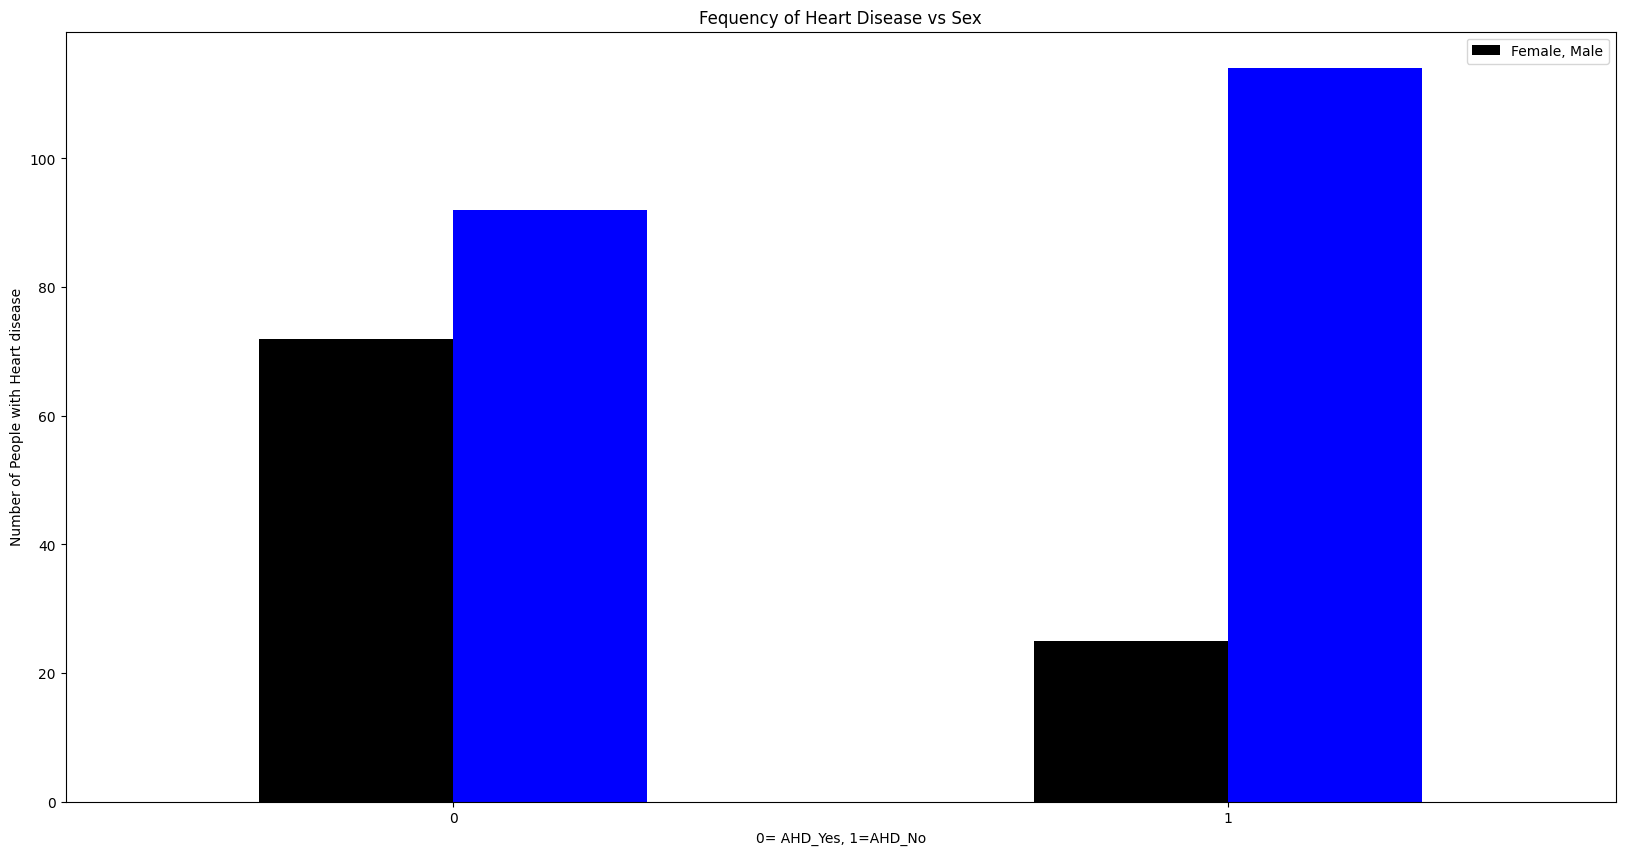

In [176]:
pd.crosstab(df_final.AHD_Yes, df_final.Sex).plot(kind='bar', figsize=(20, 10), color=['black', 'blue'])
plt.title("Fequency of Heart Disease vs Sex")
plt.xlabel("0= AHD_Yes, 1=AHD_No")
plt.ylabel("Number of People with Heart disease")
plt.legend(["Female, Male"])
plt.xticks(rotation=0);

Text(0.5, 1.0, 'males vs females with heart disease')

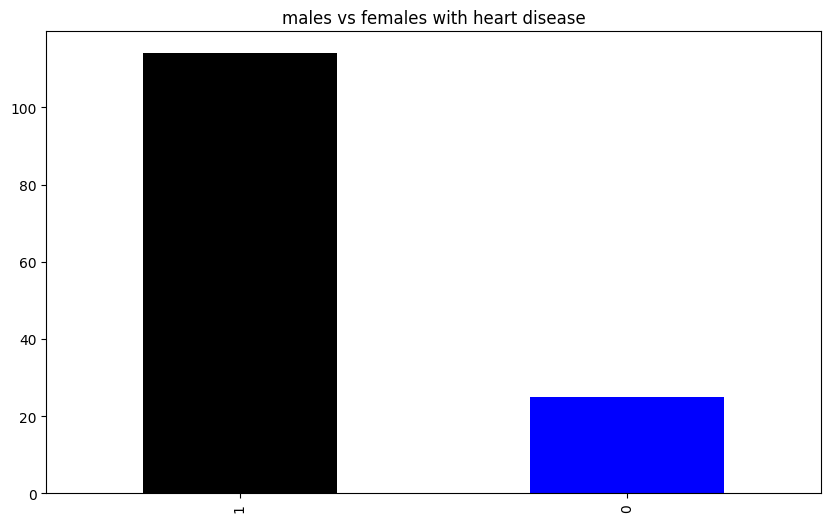

In [177]:
df_final.Sex[df_final.AHD_Yes==1].value_counts().plot(kind='bar', figsize=(10, 6), color=["black", "blue"])
plt.title("males vs females with heart disease")

In [178]:
df_final.corr()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,...,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
Unnamed: 0,1.000000,-0.002367,-0.070849,-0.022028,-0.095518,-0.039471,-0.150232,-0.105488,-0.000402,-0.120384,...,0.037011,0.042387,-0.095155,0.069630,-0.015529,0.062412,0.028772,-0.059675,-0.048765,0.048765
Age,-0.002367,1.000000,-0.097542,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,...,0.365323,0.135337,-0.051714,-0.151684,0.045438,0.062042,-0.132264,0.104902,-0.223120,0.223120
Sex,-0.070849,-0.097542,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,...,0.086048,0.086398,-0.117189,-0.037990,0.089828,0.142524,-0.387396,0.326284,-0.276816,0.276816
RestBP,-0.022028,0.284946,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,...,0.097528,0.027710,-0.050127,-0.083234,0.149737,0.075157,-0.139782,0.106210,-0.150825,0.150825
Chol,-0.095518,0.208950,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,...,0.123726,0.070343,-0.033223,-0.016453,-0.053021,-0.095743,-0.006479,0.053100,-0.085164,0.085164
Fbs,-0.039471,0.118530,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,...,0.140764,-0.062929,0.087027,-0.060649,0.055511,0.091351,-0.073766,0.030953,-0.025264,0.025264
RestECG,-0.150232,0.148868,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,...,0.131749,0.122589,-0.089526,-0.102979,0.065581,0.044672,-0.028989,0.007905,-0.169202,0.169202
MaxHR,-0.105488,-0.393806,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,...,-0.265699,-0.371989,0.159876,0.249415,0.079683,-0.159523,0.285812,-0.214326,0.417167,-0.417167
ExAng,-0.000402,0.091661,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,...,0.145788,0.464293,-0.266871,-0.233863,-0.093384,0.063073,-0.324082,0.300223,-0.431894,0.431894
Oldpeak,-0.120384,0.203805,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,...,0.301067,0.274218,-0.126339,-0.277513,0.086959,0.104635,-0.345731,0.302145,-0.424510,0.424510


<Axes: >

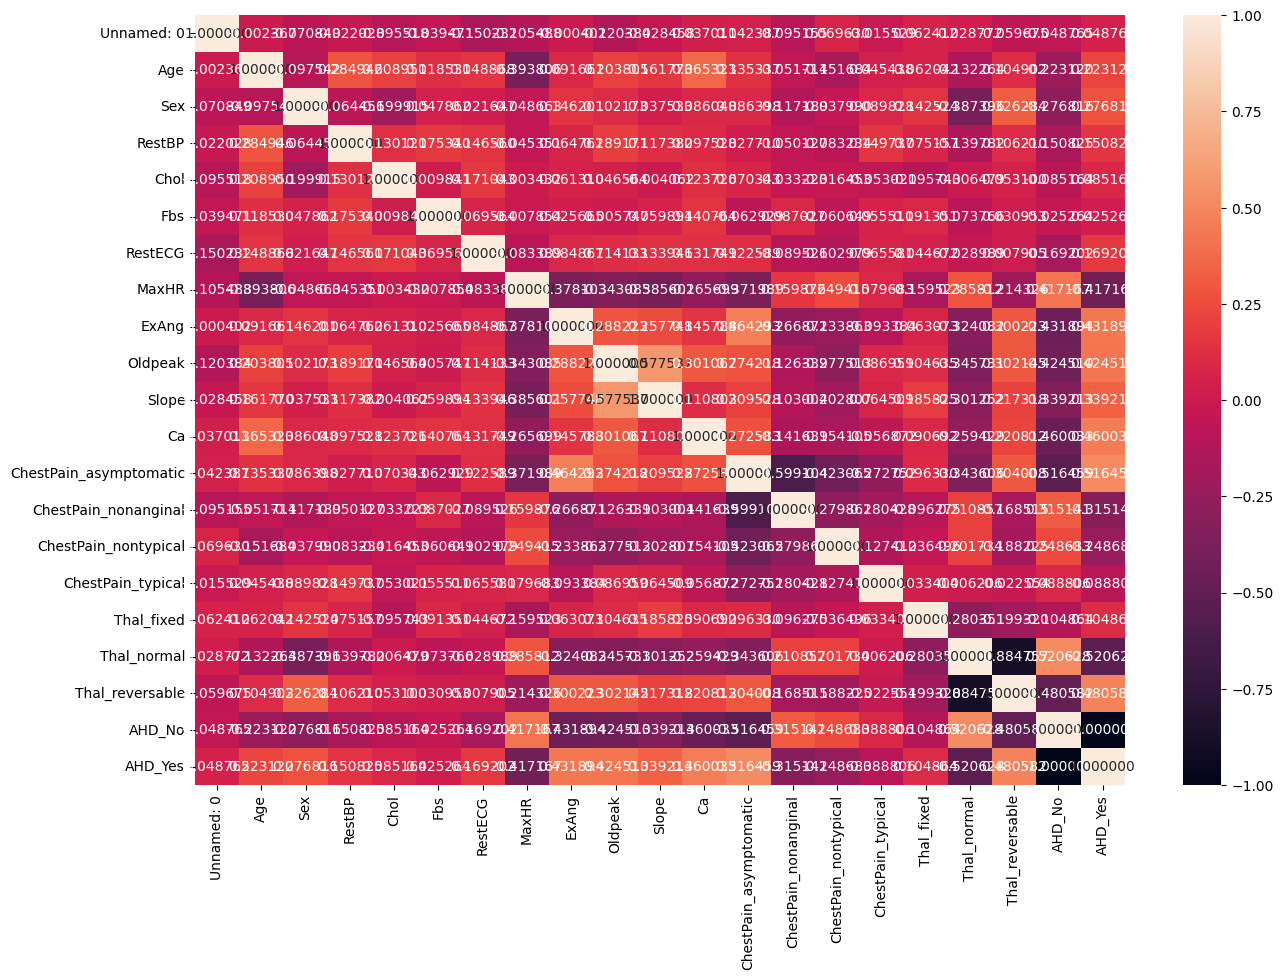

In [179]:
corr_matrix = df_final.corr()
fig,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0, fmt="3f")

In [180]:
# Conclusion:- from above co-relation and heatmap we can say that AHD_NO and AHD_yes are giving the same information, so removing one of them (AHD_No)
# droping AHD_No as its giving the same value as AHD_Yes, also droping 'Unnamed: 0' as its doesnot have any benift
df_final = df_final.drop(['AHD_No', 'Unnamed: 0'], axis = 1)
df_final.head(2)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_Yes
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0,1


In [181]:
df_final.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical',
       'Thal_fixed', 'Thal_normal', 'Thal_reversable', 'AHD_Yes'],
      dtype='object')

In [182]:
df_scaled = df_final

In [183]:
from sklearn.preprocessing import MinMaxScaler


MMscal=MinMaxScaler()
features=['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical',
       'Thal_fixed', 'Thal_normal', 'Thal_reversable']
df_scaled[features] = MMscal.fit_transform(df_final[features])
df_scaled.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_Yes
0,0.708333,1.0,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,0.791667,1.0,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.791667,1.0,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.166667,1.0,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,0.250000,0.0,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [184]:
X = df_scaled.drop("AHD_Yes", axis=1)
Y = df_scaled.AHD_Yes

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [186]:
from sklearn.feature_selection import mutual_info_regression

# This code computes the mutual information between the target variable (y_train) and each of the features in the training set (X_train), 
# then stores the result in a Pandas Series named "mutual_info".
# The mutual information is a statistical measure of the dependence between two random variables. 
# In this context, it measures the amount of information that a feature in the training set provides about the target variable.
# The code then sets the index of the "mutual_info" series to the names of the columns in the X_train dataframe, which are assumed to correspond to the features in the dataset.
# Finally, the code sorts the values of the "mutual_info" series in descending order, 
# with the most informative feature appearing first. The resulting "mutual_info" series can be used to select the most relevant features for a predictive model.

mutual_info = mutual_info_regression(X_train, Y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info = mutual_info.sort_values(ascending=False)
mutual_info

Thal_reversable           0.172213
ChestPain_asymptomatic    0.151737
Oldpeak                   0.114904
Thal_fixed                0.111142
Thal_normal               0.105987
ExAng                     0.102115
Ca                        0.097502
Slope                     0.085084
MaxHR                     0.061518
ChestPain_nontypical      0.051057
Fbs                       0.027637
RestECG                   0.003212
Chol                      0.001156
Sex                       0.000000
ChestPain_nonanginal      0.000000
ChestPain_typical         0.000000
RestBP                    0.000000
Age                       0.000000
dtype: float64

In [187]:
#Considering the columns for training the model which are more than 0% of information
#shared with dependent variable/feature

Req_columns = list(mutual_info[mutual_info > 0].index)
Req_columns

['Thal_reversable',
 'ChestPain_asymptomatic',
 'Oldpeak',
 'Thal_fixed',
 'Thal_normal',
 'ExAng',
 'Ca',
 'Slope',
 'MaxHR',
 'ChestPain_nontypical',
 'Fbs',
 'RestECG',
 'Chol']

In [188]:
X_test_final = X_test[Req_columns]
X_test_final.head(1)

,Thal_reversable,ChestPain_asymptomatic,Oldpeak,Thal_fixed,Thal_normal,ExAng,Ca,Slope,MaxHR,ChestPain_nontypical,Fbs,RestECG,Chol
204,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.687023,0.0,0.0,0.0,0.194064


In [189]:
X_test_final = X_test
X_train_final = X_train

In [190]:
def evaluation(Y_test,Y_pred):
    acc=accuracy_score(Y_test,Y_pred)
    rcl=recall_score(Y_test,Y_pred)
    f1=f1_score(Y_test,Y_pred)
    auc_score=roc_auc_score(Y_test,Y_pred)
    prec_score=precision_score(Y_test,Y_pred)
    
    metric_dict={'accuracy': round(acc*100,2),
               'recall': round(rcl*100,2),
               'F1 score': round(f1*100,2),
               'auc score': round(auc_score*100,2),
               'precision': round(prec_score*100,2)
                }
    
    return print(metric_dict)

# Training the Data with different models
### KNeighboursClassifier(K-nearest neighbours)

In [191]:
import numpy as np


np.random.seed(42)
KNC_model=  KNeighborsClassifier()
KNC_model.fit(X_train_final,Y_train)
KNC_model_y_pred=KNC_model.predict(X_test_final)
KNC_model_r2_score=round(r2_score(Y_test,KNC_model_y_pred)*100,2)
print("R2 Score for predicted value: ",KNC_model_r2_score)
print("Accuracy on Training set: ",round(KNC_model.score(X_train_final,Y_train)*100,2))
KNC_model_score = round(KNC_model.score(X_test_final,Y_test)*100,2)
print("Accuracy on Testing set: ",KNC_model_score)
evaluation(Y_test,KNC_model_y_pred)

R2 Score for predicted value:  20.26
Accuracy on Training set:  84.71
Accuracy on Testing set:  80.33
{'accuracy': 80.33, 'recall': 74.07, 'F1 score': 76.92, 'auc score': 79.68, 'precision': 80.0}


### Logistic Regression

In [192]:
np.random.seed(42)
LR_model=LogisticRegression()
LR_model.fit(X_train_final,Y_train)
LR_model_y_pred=LR_model.predict(X_test_final)
LR_model_r2_score=round(r2_score(Y_test,LR_model_y_pred)*100,2)
print("R2 Score for predicted value: ",LR_model_r2_score)
print("Accuracy on Training set: ",round(LR_model.score(X_train_final,Y_train)*100,2))
LR_model_score = round(LR_model.score(X_test_final,Y_test)*100,2)
print("Accuracy on Testing set: ",LR_model_score)
evaluation(Y_test,LR_model_y_pred)

R2 Score for predicted value:  40.2
Accuracy on Training set:  84.71
Accuracy on Testing set:  85.25
{'accuracy': 85.25, 'recall': 77.78, 'F1 score': 82.35, 'auc score': 84.48, 'precision': 87.5}


### RandomForrestClassifier

In [193]:
np.random.seed(42)
RFC_model=RandomForestClassifier()
RFC_model.fit(X_train_final,Y_train)
RFC_model_y_pred=RFC_model.predict(X_test_final)
RFC_model_r2_score=round(r2_score(Y_test,RFC_model_y_pred)*100,2)
print("R2 Score for predicted value: ",RFC_model_r2_score)
print("Accuracy on Training set: ",round(RFC_model.score(X_train_final,Y_train)*100,2))
RFC_model_score = round(RFC_model.score(X_test_final,Y_test)*100,2)
print("Accuracy on Testing set: ",RFC_model_score)
evaluation(Y_test,RFC_model_y_pred)

R2 Score for predicted value:  33.55
Accuracy on Training set:  100.0
Accuracy on Testing set:  83.61
{'accuracy': 83.61, 'recall': 77.78, 'F1 score': 80.77, 'auc score': 83.01, 'precision': 84.0}


### SVM (Support Vector Machine)

In [194]:
np.random.seed(42)
SVC_model=SVC()
SVC_model.fit(X_train_final,Y_train)
SVC_model_y_pred=SVC_model.predict(X_test_final)
SVC_model_r2_score=round(r2_score(Y_test,SVC_model_y_pred)*100,2)
print("R2 Score for predicted value: ",SVC_model_r2_score)
print("Accuracy on Training set: ",round(SVC_model.score(X_train_final,Y_train)*100,2))
SVC_model_score = round(SVC_model.score(X_test_final,Y_test)*100,2)
print("Accuracy on Testing set: ",SVC_model_score)
evaluation(Y_test,SVC_model_y_pred)

R2 Score for predicted value:  20.26
Accuracy on Training set:  90.08
Accuracy on Testing set:  80.33
{'accuracy': 80.33, 'recall': 77.78, 'F1 score': 77.78, 'auc score': 80.07, 'precision': 77.78}


### XGBClassifier (XG Boost/ Extreme Gradient Boost)

In [195]:
XGB_model=XGBClassifier()
XGB_model.fit(X_train_final,Y_train)
XGB_model_y_pred=XGB_model.predict(X_test_final)
XGB_model_r2_score=round(r2_score(Y_test,XGB_model_y_pred)*100,2)
print("R2 Score for predicted value: ",XGB_model_r2_score)
print("Accuracy on Training set: ",round(XGB_model.score(X_train_final,Y_train)*100,2))
XGB_model_score = round(XGB_model.score(X_test_final,Y_test)*100,2)
print("Accuracy on Testing set: ",XGB_model_score)
evaluation(Y_test,XGB_model_y_pred)

R2 Score for predicted value:  13.62
Accuracy on Training set:  100.0
Accuracy on Testing set:  78.69
{'accuracy': 78.69, 'recall': 77.78, 'F1 score': 76.36, 'auc score': 78.59, 'precision': 75.0}


# Cretating a dataframe with all accuracy score of models

In [196]:
all_model_score = pd.DataFrame({'Model_Name': ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbour', 'Support Vector Machine', "Extreme Gradient Boost"], 
                                'Accuracy_Score': [LR_model_score, RFC_model_score, KNC_model_score, SVC_model_score, XGB_model_score]})
all_model_score = all_model_score.sort_values(by=['Accuracy_Score'], ascending=False)
all_model_score

,Model_Name,Accuracy_Score
0,Logistic Regression,85.25
1,Random Forest,83.61
2,K-Nearest Neighbour,80.33
3,Support Vector Machine,80.33
4,Extreme Gradient Boost,78.69


# fine tuning the model

##### 1. KNeighborsClassifier

##### Manual fine tuning

In [199]:
from sklearn.neighbors import KNeighborsClassifier

j = range(1, 31)

# setup algorithm
knn_model = KNeighborsClassifier()
knn_count = 1
score_final = 0

for i in j:
    knn_model.set_params(n_neighbors = i)
    score = round(knn_model.fit(X_train_final, Y_train).score(X_test_final, Y_test)*100, 2)

    if score > score_final:
        score_final = score
        knn_count = i

print('best n_neighbors is: '+ str(knn_count) + 'with accuracy score: ' + str(score_final) + '%')


best n_neighbors is: 26with accuracy score: 83.61%


In [200]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=knn_count)
knn_model.fit(X_train_final, Y_train)
knn_model_y_pred = knn_model.predict(X_test_final)
KNC_model_r2_score=round(r2_score(Y_test,KNC_model_y_pred)*100,2)
print("R2 Score for predicted value: ",KNC_model_r2_score)
print("Accuracy on Training set: ",round(KNC_model.score(X_train_final,Y_train)*100,2))
KNC_model_score_mannual = round(KNC_model.score(X_test_final,Y_test)*100,2)
print("Accuracy on Testing set: ",KNC_model_score_mannual)
evaluation(Y_test,KNC_model_y_pred)


R2 Score for predicted value:  20.26
Accuracy on Training set:  84.71
Accuracy on Testing set:  80.33
{'accuracy': 80.33, 'recall': 74.07, 'F1 score': 76.92, 'auc score': 79.68, 'precision': 80.0}


#### Hyperparameter tunning for KNeighborsClassifier/(K-Nearest Neighbour) using GridSearchCV

In [219]:
from sklearn.model_selection import GridSearchCV


knn_param_grid={'n_neighbors': np.arange(1,31,1),
          'leaf_size': np.arange(1,31,1)}

knn_gs_model=GridSearchCV(KNeighborsClassifier(),param_grid=knn_param_grid,cv=5,verbose=True)

knn_gs_model.fit(X_train_final, Y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             verbose=True)

In [220]:
knn_gs_model.best_params_

{'leaf_size': 1, 'n_neighbors': 22}

In [221]:
best_results = pd.DataFrame(knn_gs_model.best_params_, index=[0])
best_results

,leaf_size,n_neighbors
0,1,22


In [222]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
knn_model=  KNeighborsClassifier(n_neighbors=best_results.n_neighbors[0], leaf_size = best_results.leaf_size[0] )
knn_model.fit(X_train_final,Y_train)
KNC_model_y_pred=knn_model.predict(X_test_final)
KNC_model_r2_score=round(r2_score(Y_test,KNC_model_y_pred)*100,2)
print("R2 Score for predicted value: ",KNC_model_r2_score)
print("Accuracy on Training set: ",round(knn_model.score(X_train_final,Y_train)*100,2))
KNC_model_score_gs = round(knn_model.score(X_test_final,Y_test)*100,2)
print("Accuracy on Testing set: ",KNC_model_score_gs)
evaluation(Y_test,KNC_model_y_pred)

R2 Score for predicted value:  20.26
Accuracy on Training set:  81.82
Accuracy on Testing set:  80.33
{'accuracy': 80.33, 'recall': 77.78, 'F1 score': 77.78, 'auc score': 80.07, 'precision': 77.78}


In [223]:
# getting maximum of both tunning method
KNC_model_score2 =max(KNC_model_score_gs, KNC_model_score_mannual)
KNC_model_score2

80.33

#### 2. RandomForrestClassifier

In [224]:
np.random.seed(42)
rf_count=1
score_final = 0
rfc_model = RandomForestClassifier()
#checked once till 50, still found the best estimator at 7, so decresed the range to 10 for future runs
for i in range(1,10,1):
    #print(f"With {i} estimators:")
    rfc_model=rfc_model.set_params(n_estimators=i*10,max_depth=i,random_state=i)
    score = round(rfc_model.fit(X_train_final, Y_train).score(X_test_final,Y_test)*100,2)
    if score > score_final:
        score_final = score
        rf_count = i*10
    #print(f"Accuracy: {clf2.score(X_test_final,Y_test)*100:2f}%")
print('Best n_estimators is: ' + str(rf_count) + ', with accuracy score of ' + str(score_final) +'%')

Best n_estimators is: 90, with accuracy score of 86.89%


In [225]:
np.random.seed(42)
RFC_model=RandomForestClassifier(n_estimators=rf_count, max_depth=int(rf_count/10),random_state=int(rf_count/10))
RFC_model.fit(X_train_final, Y_train)
RFC_model_y_pred=RFC_model.predict(X_test_final)
RFC_model_r2_score=round(r2_score(Y_test,RFC_model_y_pred)*100,2)
print("R2 Score for predicted value: ",RFC_model_r2_score)
print("Accuracy on Training set: ",round(RFC_model.score(X_train_final, Y_train)*100,2))
RFC_model_score2 = round(RFC_model.score(X_test_final,Y_test)*100,2)
print("Accuracy on Testing set: ",RFC_model_score2)
evaluation(Y_test,RFC_model_y_pred)

R2 Score for predicted value:  46.84
Accuracy on Training set:  100.0
Accuracy on Testing set:  86.89
{'accuracy': 86.89, 'recall': 77.78, 'F1 score': 84.0, 'auc score': 85.95, 'precision': 91.3}


#### 3.Tuning XGBClassifier(XG Boost/ Extreme Gradient Boost) using hyperparameter (RandomizedSearchCV)

In [226]:
from sklearn.model_selection import RandomizedSearchCV

learning_rate = [0.01, 0.1]
max_depth = [int(x) for x in np.linspace(5, 40, num = 6)]
min_child_weight = [int(x) for x in np.linspace(1, 20, num = 6)]
subsample =  [0.5, 0.7]
colsample_bytree = [0.5, 0.7]
objective = ['reg:squarederror']
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 2000, num = 40)]
gamma = [0.6, 0.7]
seed = [27]
reg_lambda = [2]
booster = ['dart']
colsample_bylevel = [0.6]
colsample_bynode = [0.5]

random_grid_param = {'learning_rate': learning_rate,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'objective': objective,
               'n_estimators': n_estimators,
               'gamma': gamma,
               'seed' : seed,
               'reg_lambda' : reg_lambda,
               'booster' : booster,
               'colsample_bylevel' : colsample_bylevel,
               'colsample_bynode' : colsample_bynode}


XGB_rg_model = RandomizedSearchCV(estimator = XGB_model, param_distributions = random_grid_param,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

XGB_rg_model.fit(X_train_final,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END booster=dart, colsample_bylevel=0.6, colsample_bynode=0.5, colsample_bytree=0.7, gamma=0.6, learning_rate=0.1, max_depth=19, min_child_weight=20, n_estimators=883, objective=reg:squarederror, reg_lambda=2, seed=27, subsample=0.7; total time=  37.2s
[CV] END booster=dart, colsample_bylevel=0.6, colsample_bynode=0.5, colsample_bytree=0.7, gamma=0.6, learning_rate=0.1, max_depth=19, min_child_weight=20, n_estimators=883, objective=reg:squarederror, reg_lambda=2, seed=27, subsample=0.7; total time=  35.3s
[CV] END booster=dart, colsample_bylevel=0.6, colsample_bynode=0.5, colsample_bytree=0.7, gamma=0.6, learning_rate=0.1, max_depth=19, min_child_weight=20, n_estimators=883, objective=reg:squarederror, reg_lambda=2, seed=27, subsample=0.7; total time=  36.7s
[CV] END booster=dart, colsample_bylevel=0.6, colsample_bynode=0.5, colsample_bytree=0.7, gamma=0.6, learning_rate=0.1, max_depth=19, min_child_weight=20, n_estimato

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'max_depth': [5, 12, 19, 26, 33, 40],
                                        'min_child_weight': [1, 4, 8, 12, 16,
                                                             20],
                                        'n_estimators': [20, 70, 121, 172, 223,
                                                         273, 324, 375, 426,
                                                         476, 527, 578, 629,
                                                         680, 730, 781, 832,
                                                         883, 933, 984, 1035,
                                                         1086, 1136, 1187, 1238,
                                                         1289, 1340, 1390, 1441,
                                                         1492, ...],
                                        'objective': ['reg:squarederror'],
                                        'reg_lambda': [2], 'seed': [27],
                                        'subsample': [0.5, 0.7]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [227]:
XGB_rg_model.best_params_

{'subsample': 0.7,
 'seed': 27,
 'reg_lambda': 2,
 'objective': 'reg:squarederror',
 'n_estimators': 883,
 'min_child_weight': 20,
 'max_depth': 19,
 'learning_rate': 0.1,
 'gamma': 0.6,
 'colsample_bytree': 0.7,
 'colsample_bynode': 0.5,
 'colsample_bylevel': 0.6,
 'booster': 'dart'}

In [228]:
best_results_XGB = pd.DataFrame(XGB_rg_model.best_params_, index=[0])
best_results_XGB

,subsample,seed,reg_lambda,objective,n_estimators,min_child_weight,max_depth,learning_rate,gamma,colsample_bytree,colsample_bynode,colsample_bylevel,booster
0,0.7,27,2,reg:squarederror,883,20,19,0.1,0.6,0.7,0.5,0.6,dart


In [229]:
XGB_model=XGBClassifier(subsample= best_results_XGB.subsample[0], 
                        seed= best_results_XGB.seed[0], 
                        reg_lambda= best_results_XGB.reg_lambda[0],
                        objective= best_results_XGB.objective[0],
                        n_estimators= best_results_XGB.n_estimators[0],
                        min_child_weight= best_results_XGB.min_child_weight[0],
                        max_depth= best_results_XGB.max_depth[0],
                        learning_rate= best_results_XGB.learning_rate[0],
                        gamma= best_results_XGB.gamma[0],
                        colsample_bytree= best_results_XGB.colsample_bytree[0],
                        colsample_bynode= best_results_XGB.colsample_bynode[0],
                        colsample_bylevel= best_results_XGB.colsample_bylevel[0],
                        booster= best_results_XGB.booster[0])

XGB_model.fit(X_train_final,Y_train)
XGB_model_y_pred=XGB_model.predict(X_test_final)
XGB_model_r2_score=round(r2_score(Y_test,XGB_model_y_pred)*100,2)
print("R2 Score for predicted value: ",XGB_model_r2_score)
print("Accuracy on Training set: ",round(XGB_model.score(X_train_final,Y_train)*100,2))
XGB_model_score2 = round(XGB_model.score(X_test_final,Y_test)*100,2)
print("Accuracy on Testing set: ",XGB_model_score2)
evaluation(Y_test,XGB_model_y_pred)

R2 Score for predicted value:  40.2
Accuracy on Training set:  89.67
Accuracy on Testing set:  85.25
{'accuracy': 85.25, 'recall': 77.78, 'F1 score': 82.35, 'auc score': 84.48, 'precision': 87.5}


#### 4. Hyper parameter tuning SVC(Support Vector Machine) using GridSearchCV

In [230]:
param_grid = {'C': [0.1, 1,2, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
svc_gs_model = GridSearchCV(SVC(), param_grid,cv=5, refit = True, verbose = 3) 
  
# fitting the model for grid search 
svc_gs_model.fit(X_train_final, Y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.776 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.776 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.729 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.796 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.837 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.792 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.875 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 2, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [231]:
print(svc_gs_model.best_params_)
print(f"Accuracy score:{svc_gs_model.score(X_test_final,Y_test)}%")

{'C': 10, 'gamma': 1, 'kernel': 'linear'}
Accuracy score:0.7704918032786885%


In [232]:
best_results_SVC = pd.DataFrame(svc_gs_model.best_params_, index=[0])
best_results_SVC

,C,gamma,kernel
0,10,1,linear


In [235]:
np.random.seed(42)
SVC_model=SVC(C= best_results_SVC.C[0], gamma= best_results_SVC.gamma[0], kernel= best_results_SVC.kernel[0])
SVC_model.fit(X_train_final,Y_train)
SVC_model_y_pred=SVC_model.predict(X_test_final)
SVC_model_r2_score=round(r2_score(Y_test,SVC_model_y_pred)*100,2)
print("R2 Score for predicted value: ",SVC_model_r2_score)
print("Accuracy on Training set: ",round(SVC_model.score(X_train_final,Y_train)*100,2))
SVC_model_score2 = round(SVC_model.score(X_test_final,Y_test)*100,2)
print("Accuracy on Testing set: ",SVC_model_score2)
evaluation(Y_test,SVC_model_y_pred)

R2 Score for predicted value:  6.97
Accuracy on Training set:  87.6
Accuracy on Testing set:  77.05
{'accuracy': 77.05, 'recall': 70.37, 'F1 score': 73.08, 'auc score': 76.36, 'precision': 76.0}


In [ ]:
# creating dataframe with accuracy score after tunning
all_model_score_tunned = pd.DataFrame({'Model_Name': ['Logistic Regression', 'Random Forest_Tunned', 'K-Nearest Neighbour_Tunned', 
                                                      'Support Vector Machine_Tunned',"Extreme Gradient Boost_Tunned"], 
                                'Accuracy_Score': [LR_model_score, RFC_model_score2, KNC_model_score2, SVC_model_score2, XGB_model_score2]})
all_model_score_tunned = all_model_score_tunned.sort_values(by=['Accuracy_Score'], ascending=False)
all_model_score_tunned

In [ ]:
all_model_score_final = pd.concat([all_model_score_tunned, all_model_score],0)
all_model_score_final = all_model_score_final.sort_values(by=['Accuracy_Score'], ascending=False)
all_model_score_final

# Looking at the evaluation metrics for our best model (Visual confirmation)

In [236]:
print("Best evaluation parameters achieved with Random Forest and XGBoost model:")
print("Evaluation parameters achieved with Random Forest:")
evaluation(Y_test,RFC_model_y_pred)
print("Evaluation parameters achieved with XGBoost model:")
evaluation(Y_test,XGB_model_y_pred)

Best evaluation parameters achieved with Random Forest and XGBoost model:
Evaluation parameters achieved with Random Forest:
{'accuracy': 86.89, 'recall': 77.78, 'F1 score': 84.0, 'auc score': 85.95, 'precision': 91.3}
Evaluation parameters achieved with XGBoost model:
{'accuracy': 85.25, 'recall': 77.78, 'F1 score': 82.35, 'auc score': 84.48, 'precision': 87.5}


### Evaluation metric for XGB Model

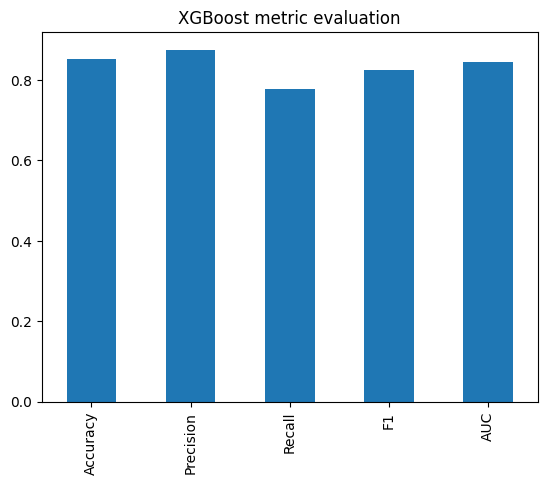

In [238]:
XGB_final_metrics={'Accuracy': XGB_model.score(X_test_final,Y_test),
                   'Precision': precision_score(Y_test,XGB_model_y_pred),
                   'Recall': recall_score(Y_test,XGB_model_y_pred),
                   'F1': f1_score(Y_test,XGB_model_y_pred),
                   'AUC': roc_auc_score(Y_test,XGB_model_y_pred)}

XGB_metrics=pd.DataFrame(XGB_final_metrics,index=[0])
XGB_metrics.T.plot.bar(title='XGBoost metric evaluation',legend=False);

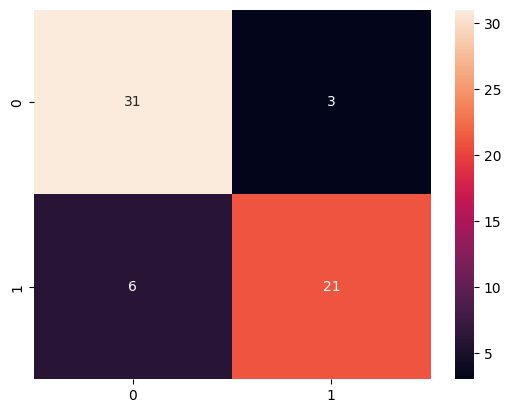

In [239]:
fig,ax=plt.subplots()
ax=sns.heatmap(confusion_matrix(Y_test,XGB_model_y_pred),annot=True,cbar=True)

### Evaluation metrics for randomforrest classifier

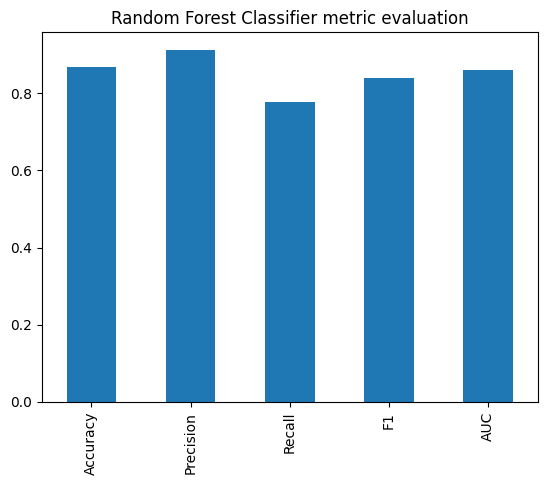

In [242]:
RFC_final_metrics={'Accuracy': RFC_model.score(X_test_final,Y_test),
                   'Precision': precision_score(Y_test,RFC_model_y_pred),
                   'Recall': recall_score(Y_test,RFC_model_y_pred),
                   'F1': f1_score(Y_test,RFC_model_y_pred),
                   'AUC': roc_auc_score(Y_test,RFC_model_y_pred)}

RFC_metrics=pd.DataFrame(RFC_final_metrics,index=[0])
RFC_metrics.T.plot.bar(title='Random Forest Classifier metric evaluation',legend=False);

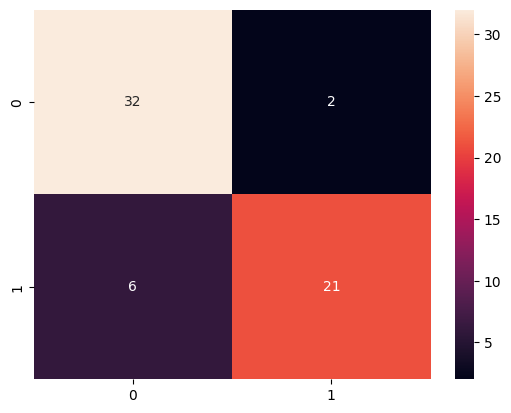

In [244]:
fig,ax = plt.subplots()
ax=sns.heatmap(confusion_matrix(Y_test,RFC_model_y_pred),annot=True,cbar=True)